In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns

In [79]:
x,y = make_moons(n_samples=1000,noise=0.2)

In [80]:
df = {'x1':x[:,0],'x2':x[:,1],'y':y}

In [81]:
db = pd.DataFrame(df)

In [82]:
db

,x1,x2,y
0,1.412882,-0.292660,1
1,-0.261491,0.037971,1
2,0.490924,1.239561,0
3,0.560263,-0.659347,1
4,1.048157,-0.302254,0
...,...,...,...
995,-0.393507,0.937305,0
996,0.994075,0.686083,0
997,0.189994,-0.212799,1
998,1.391732,-0.183492,1


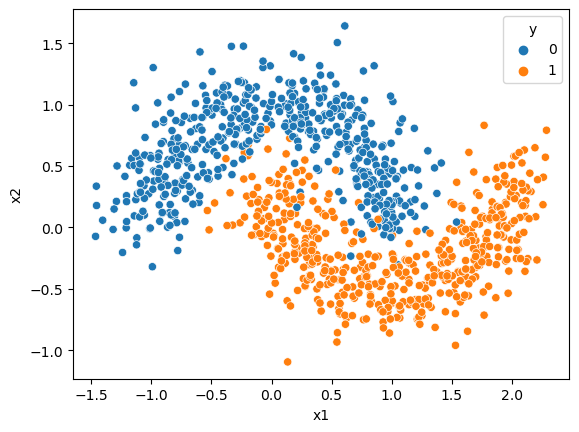

In [83]:
sns.scatterplot(x='x1',y='x2',data=db,hue='y')
plt.show()

In [84]:
x_a = db.iloc[:,:-1]
y_a = db['y']

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
x_train,x_test,y_train,y_test = train_test_split(x_a,y_a,test_size=0.2,random_state=42)

In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB

In [88]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)*100 , dt.score(x_test,y_test)*100

(100.0, 95.0)

In [90]:
sv = SVC()
sv.fit(x_train,y_train)
sv.score(x_train,y_train)*100 , sv.score(x_test,y_test)*100

(97.5, 96.0)

In [92]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)*100 , gnb.score(x_test,y_test)*100

(87.5, 85.0)

In [93]:
from sklearn.ensemble import VotingClassifier

In [95]:
li = [('dt1',DecisionTreeClassifier()),('sv1',SVC()),('gnb1',GaussianNB())]

In [106]:
vc = VotingClassifier(li)#weights=[10,4,7]
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('dt1', DecisionTreeClassifier()), ('sv1', SVC()),
                             ('gnb1', GaussianNB())])

In [107]:
vc.score(x_train,y_train)*100,vc.score(x_test,y_test)*100

(97.875, 97.0)

In [108]:
prd = {'dt':dt.predict(x_test),'svm':sv.predict(x_test),'gnb':gnb.predict(x_test),'vc':vc.predict(x_test)}

In [109]:
pd.DataFrame(prd)

,dt,svm,gnb,vc
0,1,1,1,1
1,1,0,0,0
2,0,0,0,0
3,0,0,0,0
4,1,1,1,1
...,...,...,...,...
195,1,1,1,1
196,0,0,0,0
197,0,0,0,0
198,1,1,1,1
